# Pandas Analysis of Netflix Shows and Movies

## 2. How Many Polish Movies and Shows has Netflix released (over the years)?

In [1]:
import pandas as pd # pip install pandas # if not owned

import matplotlib.pyplot as plt

from pathlib import Path

# import os

# change the paths below

USER_PATH = Path(r"C:\Users\Mateusz\Desktop\ZBIORCZE\TECH\ANALIZA DANYCH\Python\Projekty MB") # <--- here

df = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "data_cleaned.csv") 

df_cast = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "cast.csv") 

df_category = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "category.csv") 

df_country = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "country.csv") 

In [2]:
# extracting columns 

a2 = df[["type", "show_id", "country", "date_added"]]

# only rows that inlcudes 'Poland' in the country column
a2 = a2[a2["country"].str.contains("Poland")]

# extracting year from date_added column

a2["date_added"] = pd.to_datetime(a2["date_added"])

a2["date_added"] = a2.date_added.dt.year


In [3]:
# additional columns for analasis 

a2["movies"] = a2["type"].apply(lambda x: 1 if x == "Movie" else 0)

a2["shows"] = a2["type"].apply(lambda x: 1 if x == "Show" else 0)

a2["all"] = a2["type"].apply(lambda x:1)


In [4]:
# group by year

pt_a2 = a2.groupby("date_added")[["movies", "shows", "all"]].sum()

pt_a2

,movies,shows,all
date_added,,,
2016,0,1,1
2017,1,0,1
2018,6,1,7
2019,13,3,16
2020,8,2,10
2021,4,2,6


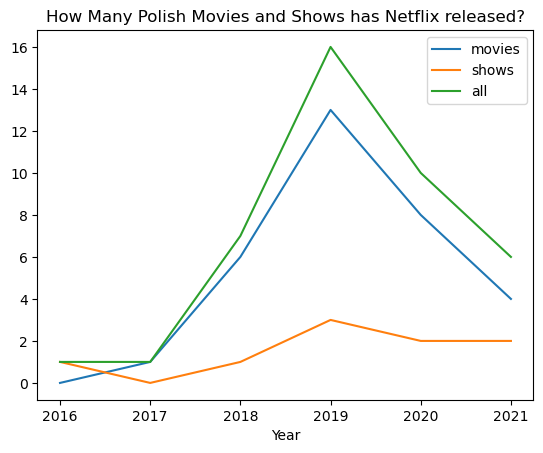

In [6]:
# final chart 

pt_a2.plot(kind = "line", title = "How Many Polish Movies and Shows has Netflix released?", xlabel = "Year")

plt.savefig(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "images" / "chart2.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# saving a file

pt_a2.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "poland_movie_and_shows.csv", index = True) 

# pt a2 # remove hashtag if you want to see output within this file